<a href="https://colab.research.google.com/github/GustavoGatti/BreastCancerSiameseNeuralNetwork/blob/main/teste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow-gpu==2.2.0-rc0

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from numpy import mean
from numpy import std
from numpy import ndarray

In [ ]:
cancer = pd.read_csv('/content/drive/My Drive/Colab Notebooks/dataR234.csv')
x = pd.DataFrame(data = cancer)
x.drop('Classification', inplace=True, axis=1)
aux = x.iloc[21]
#aux = np.asarray(aux)
aux

Age             34.000000
BMI             31.975015
Glucose         87.000000
Insulin          4.530000
HOMA             0.972138
Leptin          28.750200
Adiponectin      7.642760
Resistin         5.625920
MCP.1          572.783000
Name: 21, dtype: float64

In [ ]:
y = cancer.Classification
y


0      0
1      0
2      0
3      0
4      0
      ..
111    1
112    1
113    1
114    1
115    1
Name: Classification, Length: 116, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0, stratify = y)
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)
test_isolado = x_test[2]
print(test_isolado)

[ 78.        25.3       60.         3.508      0.519184   6.633
  10.567295   4.6638   209.749   ]


In [ ]:
print(x_test[2])

[ 78.        25.3       60.         3.508      0.519184   6.633
  10.567295   4.6638   209.749   ]


In [ ]:
x_train.shape

(92, 9)

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
print(x_test[2])

[ 1.28105086e+00 -4.28229801e-01 -1.82290405e+00 -6.06770235e-01
 -5.44698050e-01 -1.02439202e+00 -5.72133378e-04 -8.29524843e-01
 -9.21193560e-01]


In [ ]:
x_train = x_train.reshape(92,9,1)
x_test = x_test.reshape(24,9,1)

x_test[2]

array([[ 1.28105086e+00],
       [-4.28229801e-01],
       [-1.82290405e+00],
       [-6.06770235e-01],
       [-5.44698050e-01],
       [-1.02439202e+00],
       [-5.72133378e-04],
       [-8.29524843e-01],
       [-9.21193560e-01]])

In [ ]:
'''
epochs = 50
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation = 'relu', input_shape = (30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(Conv1D(filters=64, kernel_size=2, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation = 'sigmoid'))
'''

"\nepochs = 50\nmodel = Sequential()\nmodel.add(Conv1D(filters=32, kernel_size=2, activation = 'relu', input_shape = (30,1)))\nmodel.add(BatchNormalization())\nmodel.add(Dropout(0.2))\n\n\nmodel.add(Conv1D(filters=64, kernel_size=2, activation = 'relu'))\nmodel.add(BatchNormalization())\nmodel.add(Dropout(0.5))\n\nmodel.add(Flatten())\nmodel.add(Dense(64, activation = 'relu'))\nmodel.add(Dropout(0.5))\n\nmodel.add(Dense(1, activation = 'sigmoid'))\n"

In [ ]:
epochs = 200
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation = 'relu', input_shape = (9,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(Conv1D(filters=64, kernel_size=2, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation = 'softmax'))

In [ ]:
#model.compile(optimizer=Adam(lr=0.00005), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.compile(optimizer=Adam(lr=0.0005), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test), verbose=1)

Train on 92 samples, validate on 24 samples
Epoch 1/200
92/92 [==============================] - 2s 20ms/sample - loss: 1.5553 - accuracy: 0.4783 - val_loss: 0.6668 - val_accuracy: 0.7083
Epoch 2/200
92/92 [==============================] - 0s 351us/sample - loss: 0.9433 - accuracy: 0.5652 - val_loss: 0.6530 - val_accuracy: 0.7917
Epoch 3/200
92/92 [==============================] - 0s 338us/sample - loss: 1.2895 - accuracy: 0.5652 - val_loss: 0.6383 - val_accuracy: 0.7917
Epoch 4/200
92/92 [==============================] - 0s 328us/sample - loss: 0.9557 - accuracy: 0.5761 - val_loss: 0.6287 - val_accuracy: 0.7500
Epoch 5/200
92/92 [==============================] - 0s 327us/sample - loss: 1.2359 - accuracy: 0.5761 - val_loss: 0.6206 - val_accuracy: 0.8750
Epoch 6/200
92/92 [==============================] - 0s 355us/sample - loss: 0.9301 - accuracy: 0.5870 - val_loss: 0.6147 - val_accuracy: 0.8750
Epoch 7/200
92/92 [==============================] - 0s 342us/sample - loss: 0.9596 - a

In [ ]:
def plot_learningCurve(history, epochs):

  #Plot Training e validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

  #Plot training e validation accuracy loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

In [ ]:
def plot_learningCurve2(history, epochs):

  #Plot Training e validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

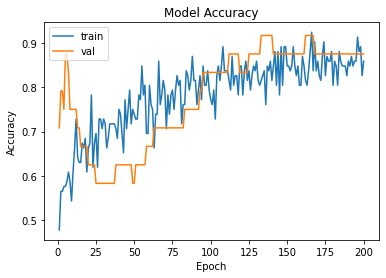

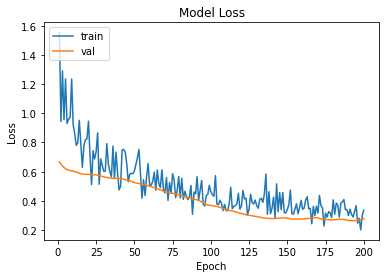

In [ ]:
plot_learningCurve(history,epochs)

In [ ]:
results = model.evaluate(x_test, y_test, batch_size=128)
print('test loss, test acc:', results)


24/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 242us/sample - loss: 0.2785 - accuracy: 0.8750
test loss, test acc: [0.2784515917301178, 0.875]


In [ ]:
def evaluate_model(x_train, y_train, x_test, y_test):
	verbose, epochs, batch_size = 1, 200, 128
	model = Sequential()
	model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(9,1)))
	model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
	model.add(Dropout(0.5))
 
	model.add(Flatten())
	model.add(Dense(100, activation='relu'))
	model.add(Dense(2, activation='softmax'))
	model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	# fit network
	model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test), verbose=1)
	# evaluate model
	_, accuracy = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=0)
	return accuracy

In [ ]:
# repeat experiment
repeats = 5
scores = list()
for r in range(repeats):
	score = evaluate_model(x_train, y_train, x_test, y_test)
	score = score * 100.0
	print('>#%d: %.3f' % (r+1, score))
	scores.append(score)

Train on 92 samples, validate on 24 samples
Epoch 1/200
92/92 [==============================] - 1s 6ms/sample - loss: 0.7011 - accuracy: 0.3804 - val_loss: 0.6426 - val_accuracy: 0.7500
Epoch 2/200
92/92 [==============================] - 0s 295us/sample - loss: 0.6777 - accuracy: 0.5109 - val_loss: 0.6015 - val_accuracy: 0.6667
Epoch 3/200
92/92 [==============================] - 0s 263us/sample - loss: 0.6540 - accuracy: 0.6739 - val_loss: 0.5687 - val_accuracy: 0.7083
Epoch 4/200
92/92 [==============================] - 0s 292us/sample - loss: 0.6487 - accuracy: 0.6087 - val_loss: 0.5412 - val_accuracy: 0.7917
Epoch 5/200
92/92 [==============================] - 0s 271us/sample - loss: 0.6283 - accuracy: 0.6739 - val_loss: 0.5144 - val_accuracy: 0.8750
Epoch 6/200
92/92 [==============================] - 0s 270us/sample - loss: 0.6169 - accuracy: 0.7500 - val_loss: 0.4867 - val_accuracy: 0.9583
Epoch 7/200
92/92 [==============================] - 0s 262us/sample - loss: 0.6015 - ac

In [ ]:
'''
def mean(x):
	s = 0;
	for i in x:
		s = s+ i
	return s / len(x)
'''

'\ndef mean(x):\n\ts = 0;\n\tfor i in x:\n\t\ts = s+ i\n\treturn s / len(x)\n'

In [ ]:
def summarize_results(scores):
	print(scores)
	m, s = mean(scores), std(scores)
	print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))

In [ ]:

# run an experiment
def run_experiment(repeats=10):
	# load data
	# repeat experiment
	scores = list()
	for r in range(repeats):
		score = evaluate_model(x_train, y_train, x_test, y_test)
		score = score * 100.0
		print('>#%d: %.3f' % (r+1, score))
		scores.append(score)
	# summarize results
summarize_results(scores)

[100.0, 83.33333134651184, 95.83333134651184, 95.83333134651184, 91.66666865348816, 95.83333134651184, 91.66666865348816, 91.66666865348816, 95.83333134651184, 87.5]
Accuracy: 92.917% (+/-4.583)


In [ ]:
run_experiment()

Train on 92 samples
Epoch 1/10
92/92 [==============================] - 0s 5ms/sample - loss: 0.6962 - accuracy: 0.4674
Epoch 2/10
92/92 [==============================] - 0s 78us/sample - loss: 0.6814 - accuracy: 0.6087
Epoch 3/10
92/92 [==============================] - 0s 147us/sample - loss: 0.6723 - accuracy: 0.5761
Epoch 4/10
92/92 [==============================] - 0s 54us/sample - loss: 0.6528 - accuracy: 0.5978
Epoch 5/10
92/92 [==============================] - 0s 62us/sample - loss: 0.6493 - accuracy: 0.6304
Epoch 6/10
92/92 [==============================] - 0s 62us/sample - loss: 0.6491 - accuracy: 0.6304
Epoch 7/10
92/92 [==============================] - 0s 76us/sample - loss: 0.6444 - accuracy: 0.6304
Epoch 8/10
92/92 [==============================] - 0s 61us/sample - loss: 0.6291 - accuracy: 0.6630
Epoch 9/10
92/92 [==============================] - 0s 65us/sample - loss: 0.6340 - accuracy: 0.7065
Epoch 10/10
92/92 [==============================] - 0s 76us/sample - l

In [ ]:
from sklearn.metrics import confusion_matrix

predict = model.predict_classes(x_test)
cm = confusion_matrix(y_test, predict)
print(cm)


TP = cm[0][0]
TN = cm[1][1]
FP = cm[1][0]
FN = cm[0][1] 

print('Testing Accuracy: ',(TP+TN)/(TP+TN+FN+FP))

[[ 9  2]
 [ 1 12]]
Testing Accuracy:  0.875


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

Y_pred = model.predict(x_test)
Y_pred = np.argmax(Y_pred, axis=1)
Y_pred = model.predict_classes(x_test)

new_y = y_test.reshape(24,1,1)

print(y_test)

p = model.predict_proba(x_test)

target_names = ['Class 1(Control)', 'Class 2(Cancer)']
print(classification_report(np.argmax(new_y, axis=1),Y_pred,target_names=target_names))
print(confusion_matrix(np.argmax(new_y, axis=1),Y_pred))

[1 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 1 0]
                  precision    recall  f1-score   support

Class 1(Control)       1.00      0.42      0.59        24
 Class 2(Cancer)       0.00      0.00      0.00         0

        accuracy                           0.42        24
       macro avg       0.50      0.21      0.29        24
    weighted avg       1.00      0.42      0.59        24

[[10 14]
 [ 0  0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
def predict(model, x_aux, y_aux):

    prediction = model.predict(x_aux)
    print(prediction)

    prediction_index = np.argmax(prediction,axis=1)
    print(" Prediction index: {}".format( prediction_index))



In [ ]:
test_isolado = np.asarray(test_isolado)
print(test_isolado)

#36	28,5766758494031	86	4,345	0,921719333333333	15,1248	8,6	9,1539	534,224

atila = [[36,28.5766758494031,86,4.345,0.921719333333333,15.1248,	8.6,9.1539,534.224]]

print(atila)
atila = scaler.transform(atila)
print(atila)
atila = atila.reshape(1,9,1)
print(atila)
atila_y = 0
atila
predict(model, atila, atila_y)

[ 78.        25.3       60.         3.508      0.519184   6.633
  10.567295   4.6638   209.749   ]
[[36, 28.5766758494031, 86, 4.345, 0.921719333333333, 15.1248, 8.6, 9.1539, 534.224]]
[[-1.31056198  0.24332226 -0.52978825 -0.52215874 -0.43538139 -0.57787387
  -0.27215301 -0.47680335  0.00608853]]
[[[-1.31056198]
  [ 0.24332226]
  [-0.52978825]
  [-0.52215874]
  [-0.43538139]
  [-0.57787387]
  [-0.27215301]
  [-0.47680335]
  [ 0.00608853]]]
[[0.8379102  0.16208978]]
 Prediction index: [0]


In [ ]:
x_aux = x_test[2]
x_aux
print(x_aux)

x_aux = x_aux.reshape(1,9, 1)
print(x_aux)

y_aux = y_test[2]
print(y_aux)
predict(model, x_aux, y_aux)

[[ 1.28105086e+00]
 [-4.28229801e-01]
 [-1.82290405e+00]
 [-6.06770235e-01]
 [-5.44698050e-01]
 [-1.02439202e+00]
 [-5.72133378e-04]
 [-8.29524843e-01]
 [-9.21193560e-01]]
[[[ 1.28105086e+00]
  [-4.28229801e-01]
  [-1.82290405e+00]
  [-6.06770235e-01]
  [-5.44698050e-01]
  [-1.02439202e+00]
  [-5.72133378e-04]
  [-8.29524843e-01]
  [-9.21193560e-01]]]
0
[[0.99015146 0.00984849]]
 Prediction index: [0]
